## Assignment No.1

1. Use any suitable dataset (e.g. https://www.kaggle.com/zhaoyingzhu/heartesv) and Perform
following operation on given dataset suitable programming language,

a) Find Missing Values and replace the missing values with suitable alternative.

b) Remove inconsistency (if any) in the dataset.

c) Prepare boxplot analysis for each numerical attribute. Find outliers (if any) in each attribute
in the dataset.

d) Draw histogram for any two suitable attributes (E.g. age and Chol attributes for above
dataset)

e) Find data type of each column.

f) Finding out Zero's.

g) Find Mean age of patients considering above dataset.

h) Find shape of data

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
data=pd.read_csv("Titanic.csv")

In [8]:
data.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [9]:
data.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [11]:
data.shape

(1313, 5)

In [12]:
#finding missing values and replace the missing values with suitable alternate
data.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

In [13]:
data.columns

Index(['Name', 'PClass', 'Age', 'Sex', 'Survived'], dtype='object')

In [14]:
data['PClass'].fillna(data['PClass'].mode(0),inplace=True)  #fill PClass with mode

C:\Users\HP\AppData\Local\Temp\ipykernel_22016\3788322793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PClass'].fillna(data['PClass'].mode(0),inplace=True)  #fill PClass with mode


In [15]:
data.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].median())
#fill PClass with median

In [17]:
data.isnull().sum()

Name        0
PClass      1
Age         0
Sex         0
Survived    0
dtype: int64

In [18]:
#Check for Duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Duplicate Rows: {duplicate_count}")

Duplicate Rows: 0


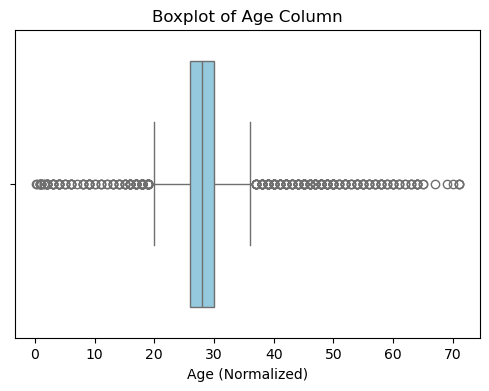

In [19]:
# Plot a boxplot for the Age column
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Age'], color='skyblue')
plt.title("Boxplot of Age Column")
plt.xlabel("Age (Normalized)")
plt.show()

In [20]:
#Check for outliers using IQR Method(For Age column)
Q1= data['Age'].quantile(0.25)
Q1

26.0

In [21]:
Q3= data['Age'].quantile(0.75)
Q3

30.0

In [22]:
IQR=Q3-Q1
IQR

4.0

In [23]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
lower_bound

20.0

In [24]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

36.0

In [25]:
# Find outliers in the Age column
outliers = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]
outliers.count()

Name        945
PClass      944
Age         945
Sex         945
Survived    945
dtype: int64

In [26]:
duplicate_count,outliers.shape[0]

(0, 945)

In [27]:
Survived_counts=data['Survived'].value_counts()

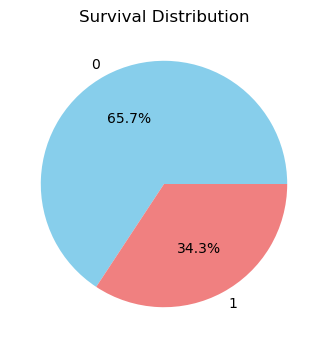

In [28]:
# Plot a boxplot for the Age column
plt.figure(figsize=(6, 4))
plt.pie(Survived_counts, labels=Survived_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Survival Distribution")
plt.show()

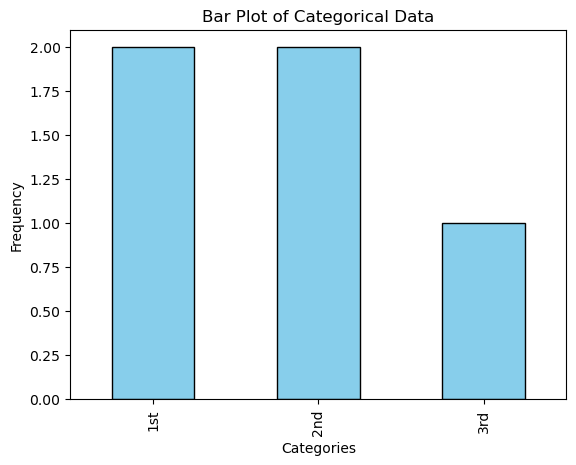

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

data = ['1st', '2nd', '1st', '3rd', '2nd']
series = pd.Series(data)
series.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of Categorical Data')
plt.show()
